In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X = np.array([[1,2],[1.5,1.8],[5,8],
              [8,8],[1,0.6],[9,11]])

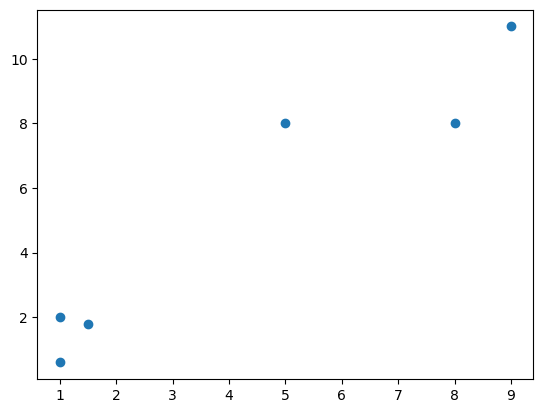

In [5]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [15]:
def fit(data,k=2,max_iter=100):
    means = []
    #randomly initialize the means
    for i in range(k):
        means.append(data[i])
    for i in range(max_iter):
        # assign the clusters data points belong to
        
        clusters = []
        
        #empty clusters
        for j in range(k):
            clusters.append([])
            
        for point in data:
            # find dis to all mean values
            distances = [((point-m)**2).sum() for m in means]
            
            # find min distance
            minDistance = min(distances)
            
            # find cluster index for which we got the min distance -->l
            l = distances.index(minDistance)
            
            # add this point to cluster
            clusters[l].append(point)
            
        
        # calculate the new means for each cluster
        
        changes=False
        for j in range(k):
            new_mean =np.average(clusters[j],axis=0)
            
            if not np.array_equal(means[j],new_mean):
                change=True
            
            
            means[j] = new_mean
        
        if not change:
            break
        
    return means
            
        

In [26]:
def predict(test_data,means):
    predictions=[]
    for point in test_data:
     # find dis to all mean values
        distances = [((point-m)**2).sum() for m in means]

        # find min distance
        minDistance = min(distances)

        # find cluster index for which we got the min distance -->l
        l = distances.index(minDistance)

        # add cluster index to predictions
        predictions.append(l)
    return predictions


In [20]:
means = fit(X)

In [29]:
predict(X,means)

[0, 0, 1, 1, 0, 1]

# Implementing KMeans class


In [47]:
class K_Means:
    def __init__(self,k=2,max_iter=100):
        print("constructor")
        self.k=k
        self.max_iter=max_iter
        
        
        
    def fit(self,data):
        
        k=self.k
        max_iter = self.max_iter
        
        
        means = []
        #randomly initialize the means
        for i in range(k):
            means.append(data[i])
        for i in range(max_iter):
            # assign the clusters data points belong to

            clusters = []

            #empty clusters
            for j in range(k):
                clusters.append([])

            for point in data:
                # find dis to all mean values
                distances = [((point-m)**2).sum() for m in means]

                # find min distance
                minDistance = min(distances)

                # find cluster index for which we got the min distance -->l
                l = distances.index(minDistance)

                # add this point to cluster
                clusters[l].append(point)


            # calculate the new means for each cluster

            changes=False
            for j in range(k):
                new_mean =np.average(clusters[j],axis=0)

                if not np.array_equal(means[j],new_mean):
                    change=True


                means[j] = new_mean

            if not change:
                break

        self.means = means
    
    
    def predict(self,test_data):
        
        means = self.means
        predictions=[]
        for point in test_data:
         # find dis to all mean values
            distances = [((point-m)**2).sum() for m in means]

            # find min distance
            minDistance = min(distances)

            # find cluster index for which we got the min distance -->l
            l = distances.index(minDistance)

            # add cluster index to predictions
            predictions.append(l)
        return predictions




In [48]:
kmeans =  K_Means(2,10)

constructor


In [49]:
kmeans.fit(X)

In [50]:
kmeans.predict(X)

[0, 0, 1, 1, 0, 1]

In [51]:
kmeans.means

[array([1.16666667, 1.46666667]), array([7.33333333, 9.        ])]